#**Natural Language Processing (NLP) Application**
#Medical Bios Dataset

###Group Members
* Benjamin Ly - 20205432
* Camilla Dyg Hannesbo - 20202923
* Laura Veng Larsen - 20231037
* Tobias Moesgård Jensen - 20231658

# Introduction

**Dataset Description**

The dataset comprises English biographies labeled with occupations. It includes a subset of 10,000 biographies (8k train/1k dev/1k test) where our focus is primarily on the train data, targeting 5 medical occupations (psychologist, surgeon, nurse, dentist, physician). We collect and release human rationale annotations for a subset of 100 biographies in two different settings: non-contrastive and contrastive. In the former, the annotators were asked to find the rationale for the question: "Why is the person in the following short bio described as a L?", where L is the gold label occupation, e.g., nurse. In the latter, the question was "Why is the person in the following short bio described as a L rather than a F", where F (foil) is another medical occupation, e.g., physician.

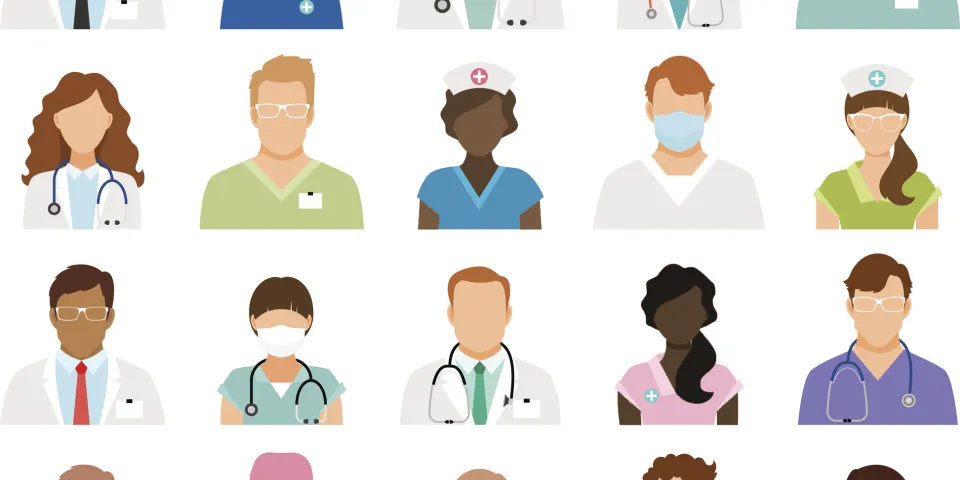

## Importing modules and loading in the data

In [ ]:
# At first we will install the python packages we are using in this notebook.
# We make the --q commant after the name of the libraries since we would like to make the installation quiet.

# Install the tweet-preprocessor library (used for cleaning and preprocessing tweets)
!pip install text-preprocessing --q

# Install the latest version of gensim (a library for topic modeling and document similarity analysis)
!pip install --q -U gensim

# Install pyLDAvis (a Python library for interactive topic model visualization)
!pip install --q pyLDAvis

# Force reinstall numpy to version 1.22.4. This is currently necessary to ensure compatibility or fix certain issues.
!pip install --force-reinstall --q numpy==1.22.4

# Install LIME (Local Interpretable Model-Agnostic Explanations), a library for explaining machine learning model predictions
!pip install --q lime

# Install or update the imbalanced-learn library, useful for dealing with imbalanced datasets
!pip install -U imbalanced-learn --q

#Install the datasets
!pip install datasets --q

#Install Gradio for the app
!pip install gradio --q

!pip install typing_extensions

!pip install spacy --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0

In [ ]:
# Import the necessary libraries

# Basic libraries for data manipulation, numerical operations, visualization ect.
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations
from text_preprocessing import preprocess_text # text prepro
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation, lemmatize_word #text prepro
from tqdm.notebook import tqdm #progress bar
import spacy #spacy for quick language prepro
nlp = spacy.load('en_core_web_sm') #instantiating English module

# Sampling, splitting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


# Loading ML libraries
from sklearn.pipeline import make_pipeline #pipeline creation
from sklearn.feature_extraction.text import TfidfVectorizer #transforms text to sparse matrix
from sklearn.linear_model import LogisticRegression #Logit model
from sklearn.metrics import classification_report #that's self explanatory
from sklearn.decomposition import TruncatedSVD #dimensionality reduction
from xgboost import XGBClassifier
import altair as alt #viz

# Explainability
from lime.lime_text import LimeTextExplainer
from collections import OrderedDict

# Topic modeling
from gensim.corpora.dictionary import Dictionary # Import the dictionary builder
from gensim.models import LdaMulticore # we'll use the faster multicore version of LDA

# Import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Import Gradio for the app
import gradio as gr

pyLDAvis.enable_notebook()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:267: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.4/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [ ]:
# For controlling warnings in the code from ipykernel
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import the dataset
from datasets import load_dataset
dataset = load_dataset("coastalcph/medical-bios", "standard")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
# Looking at the dataset which includes a subset of 10,000 biographies (8k train/1k test/1k validation)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
})

In [ ]:
#Splitting the subsets for train_data
train_data = dataset['train']

In [ ]:
#Visualizing the train data to see that it has been split
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 8000
})

In [ ]:
#Turning the train data, which is currently a library, into a pandas dataframe
df_train = pd.DataFrame(train_data)

In [ ]:
#Looking at the dataframe
df_train.head()

text  label
0  He has been a practicing Dentist for 20 years....      3
1  He was happy to return to this area with his w...      1
2  Having counseled more than 1,700 clients, he s...      0
3  She has received a 3.5 out of 5 star rating by...      4
4  Father Percival owns his own bamboo fence busi...      2

#Preprocessing
This step includes preparing textual data for analysis or modeling tasks. It includes lemmatization, tokenization, filtering, and removing punctuation. Lowercasing covers converting all texts to lowercase to ensure that two words that share the same meaning but hold lower-and uppercase letters will not increase the vocabulary size.
Tokenization means breaking the text into individual words, namely tokens.
Filtering refers to removing stopwords, which implies eliminating common words that may not carry significant meaning, such as "and," "the," or "is."
Removing Punctuation includes dropping punctuation marks, and other special symbols. Lemmatization includes reducing words to their root form to consolidate variations of words (e.g., "running" to "run"). Conclusively ending up with a cleaned text, "clean_text" as seen below.

In [ ]:
# run progress bar and clean up using spacy but without some heavy parts of the pipeline

clean_text = []

pbar = tqdm(total=len(df_train['text']),position=0, leave=True)

for text in nlp.pipe(df_train['text'], disable=["tagger", "parser", "ner"]):

  txt = [token.lemma_.lower() for token in text
         if token.is_alpha
         and not token.is_stop
         and not token.is_punct]

  clean_text.append(" ".join(txt))

  pbar.update(1)

  0%|          | 0/8000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
clean_text

['practicing dentist years bds currently associated sree sai dental clinic sowkhya ayurveda speciality clinic chennai book appointment online vikram prasad consult privately',
 'happy return area wife children opportunity arose graduating university utah school medicine completing year orthopedic surgery residency program university iowa clark completed sports medicine arthroscopy fellowship southern california orthopedic institute sports medicine',
 'having counseled clients says fail understand fathers influenced career success failure satisfaction believes mothers play important role offspring workplace behavior especially daughters',
 'received star rating patients areas expertise include sexually transmitted diseases stds menopause ablation tharappel jacob hospital clinic affiliations include memorial hermann sugar land hospital houston methodist honors blue cross blue shield bronze blue cross blue shield hmo blue cross blue shield gold tharappel jacob open new patients graduate r

In [ ]:
def text_prepro(texts: pd.Series) -> list:
    """
    Preprocess a series of texts.

    Parameters:
    - texts: A pandas Series containing the text to be preprocessed.
    - nlp: A spaCy NLP model.

    Returns:
    - A list of preprocessed texts.

    Steps:
    - Clean twitter-specific characters using a predefined 'prepro' method.
    - Normalize the text by lowercasing and lemmatizing.
    - Remove punctuations, stopwords, and non-alphabet characters.
    """

    # Initialize container for the cleaned texts
    clean_container = []

    # Use tqdm for a progress bar
    pbar = tqdm(total=len(texts), position=0, leave=True)

    # Use spaCy's nlp.pipe for efficient text processing
    for doc in nlp.pipe(texts, disable=["tagger", "parser", "ner"]):

        # Extract lemmatized tokens that are not punctuations, stopwords, or non-alphabetic
        tokens = [token.lemma_.lower() for token in doc
                  if token.is_alpha and not token.is_stop and not token.is_punct]

        clean_container.append(" ".join(tokens))

        pbar.update(1)

    return clean_container

In [ ]:
df_train['text_clean'] = text_prepro(df_train['text'])

  0%|          | 0/8000 [00:00<?, ?it/s]

In [ ]:
# Depicting the original text "text", and holding it up against the cleaned text "text_clean".
df_train

text  label  \
0     He has been a practicing Dentist for 20 years....      3   
1     He was happy to return to this area with his w...      1   
2     Having counseled more than 1,700 clients, he s...      0   
3     She has received a 3.5 out of 5 star rating by...      4   
4     Father Percival owns his own bamboo fence busi...      2   
...                                                 ...    ...   
7995  His areas of expertise include facelift, thigh...      1   
7996  That all changed with the publishing of her pa...      0   
7997  In his clinical experience and his work on tel...      0   
7998  She is an Assistant Professor in the Departmen...      4   
7999  Dr. Kaustubh Gupte practices at Solar Dentals ...      1   

                                             text_clean  
0     practicing dentist years bds currently associa...  
1     happy return area wife children opportunity ar...  
2     having counseled clients says fail understand ...  
3     received star rating patients areas expertise ...  
4     father percival owns bamboo fence business fre...  
...                                                 ...  
7995  areas expertise include facelift thigh lift th...  
7996  changed publishing paper social interactions s...  
7997  clinical experience work television seen hand ...  
7998  assistant professor department pediatrics univ...  
7999  kaustubh gupte practices solar dentals jaitala...  

[8000 rows x 3 columns]

In [ ]:
# Renaming and reordering so that we see the cleaned text going forward
# Labels include 0=psychologist, 1=surgeon, 2=nurse, 3=dentist, 4=physician

df_train_clean = pd.DataFrame({'label':df_train['label'], 'text':df_train['text_clean']})

In [ ]:
df_train_clean

label                                               text
0         3  practicing dentist years bds currently associa...
1         1  happy return area wife children opportunity ar...
2         0  having counseled clients says fail understand ...
3         4  received star rating patients areas expertise ...
4         2  father percival owns bamboo fence business fre...
...     ...                                                ...
7995      1  areas expertise include facelift thigh lift th...
7996      0  changed publishing paper social interactions s...
7997      0  clinical experience work television seen hand ...
7998      4  assistant professor department pediatrics univ...
7999      1  kaustubh gupte practices solar dentals jaitala...

[8000 rows x 2 columns]

In [ ]:
# Now we want to count the English biographies in regards to their labeled professions
df_train_clean.label.value_counts().reset_index()

label  count
0      0   2200
1      2   1638
2      3   1533
3      4   1349
4      1   1280

In [ ]:
# We want to show the distribution of one variable within the categories of other variables, which is why we choose to visualize this in the below barchart.
# Count and reset index
data_chart = df_train_clean.label.value_counts().reset_index().rename(columns={'label': 'Category', 'count': 'Texts'})

# Replace numerical categories with textual descriptions
data_chart['Category'] = data_chart['Category'].map({0: 'Psychologist', 1: 'Surgeon', 2: 'Nurse', 3: 'Dentist', 4: 'Physician'})

# Plot the chart
chart = alt.Chart(data_chart).mark_bar(filled=True).encode(
    alt.X('Texts', title='Number of Texts'),
    alt.Y('Category', title='Profession', sort='-x'),
    color=alt.Color('Category:N', legend=alt.Legend(title="Profession"), scale=alt.Scale(
        domain=['Psychologist', 'Surgeon', 'Nurse', 'Dentist', 'Physician'],
        range=['green', 'red', 'blue','orange','brown']
    ))
)

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Conclusion on the barchart**

It shows the distribution of biographies in relation to their associated professions. We see that there is a high number of English biographies categorised and which concerns Psychologists, which is depicted as the green bar. The least number of English biographies is seen in surgeons, which is depicted in the red bar. The further analysis will explore whether the texts are labelled correct, and the above barchart represents reality, or whether the model has some difficulties in determining whether the biographies contains surgeon content or nurse content for instance. This visualization also highlights the fact that the data is imbalanced, which will be considered in the below section.

# NLP & Supervised Machine Learning
This step dives into the combination of NLP and supervised machine learning.Which involves training models capable of understanding and processing words and languages. Specifically this step includes training a supervised machine learning model to predict what profession the English biographies belongs to. Lastly, analyzing the model's performance and deriving insights is crucial.  

In [ ]:
# First, as we saw above, the english biographies in regards to their labeled professions showed various counts, therefore we want to fix the sample imbalance
rus = RandomUnderSampler(random_state=42) # Setting the random state ensures that the results of a machine learning algorithm are reproducible,
data_df_res, y_res = rus.fit_resample(df_train_clean, df_train_clean['label'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [ ]:
# We depict the current balance of the sample.
# Due to the fact that the lowest number of texts was found to be 1280 in the proffesion of physicians
# the other texts in regards to their proffesion is adapted to 1280 as well. The further analysis is based on these below numbers.
data_df_res['label'].value_counts()

label
0    1280
1    1280
2    1280
3    1280
4    1280
Name: count, dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
# The test_size parameter is set to 0.2, indicating that 20% of the data is allocated to the test set, and the remaining 80% is used for training.
X_train, X_test, y_train, y_test = train_test_split(data_df_res['text'], y_res, test_size = 0.2, random_state = 42)

In [ ]:
# Instantiate models and "bundle up as pipeline"
# TfidfVectorizer object is used for text preprocessing and feature extraction.
# LogisticRegression is a linear model commonly used for binary classification tasks.
# Logistic regression models the probability of a binary outcome based on one or more predictor variables.

tfidf = TfidfVectorizer()
cls = LogisticRegression()

pipe = make_pipeline(tfidf, cls)

In [ ]:
# Fitting the model
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# Evaluating the model's performance on the training set
# A classification report is a valuable resource for understanding how well the model performs for different classes
# Thus, identify potential issues such as misclassification of specific classes.

y_eval = pipe.predict(X_train)
report = classification_report(y_train, y_eval)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1002
           1       0.96      0.89      0.93      1024
           2       0.97      0.95      0.96      1025
           3       0.96      0.97      0.96      1034
           4       0.89      0.94      0.92      1035

    accuracy                           0.95      5120
   macro avg       0.95      0.95      0.95      5120
weighted avg       0.95      0.95      0.95      5120



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

**Conclusion on the Classification Report on the training data**

- Precision (also called Positive Predictive Value): Precision measures how many of the predicted positive instances for a class were actually correct. TP/(TP+FP). The precision values ranges between 0,89 and 0,97.
- Recall (also called True Positive Rate or Sensitivity): Recall measures how many of the actual positive instances for a class were correctly predicted. TP/(TP+FN). The recall values ranges between 0,89 and 0,97.
- F1-Score: The F1-Score is the harmonic mean of precision and recall and provides a single metric that balances both precision and recall. 2⋅(Precision⋅Recall)/(Precision+Recall). The F1 values ranges between 0,92 and 0,96.
- Support: Support is the number of actual instances of each class in the dataset. This is 1002, 1024, 1025, 1034, and 1035 respectively.

- Accuracy: This is the overall accuracy of the classification model, calculated as the ratio of correctly predicted instances to the total number of instances. (TP+TN)/(TP+TN+FP+FN). The accuracy is 95%.
- Macro Avg (Macro Average): This is the average of the precision, recall, and F1-score across all classes, giving equal weight to each class. The macro average is 95%.
- Weighted Avg (Weighted Average): This is the weighted average of precision, recall, and F1-score, where the weights are determined by the number of instances in each class. It provides a measure of overall model performance while taking class imbalances into account. The weighted average is 95%.

In [ ]:
# Evaluating the model's performance on the test set
y_eval = pipe.predict(X_test)
report = classification_report(y_test, y_eval)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       278
           1       0.87      0.71      0.78       256
           2       0.79      0.79      0.79       255
           3       0.96      0.92      0.94       246
           4       0.74      0.74      0.74       245

    accuracy                           0.82      1280
   macro avg       0.82      0.82      0.82      1280
weighted avg       0.82      0.82      0.82      1280



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

**Conclusion on the Classification Report on the test data**

Here the precision values ranges between 0,74 and 0,96. The recall values ranges between 0,71 and 0,93. The F1 values ranges between 0,74 and 0,94.
The support numbers are 278, 256, 255, 246, and 245 respectively.
- The accuracy is 82%.
- The macro average is 82%.
- The weighted average is 82%.

In [ ]:
# Checking the model and thus running a random, single prediction
t1 = ['she is a dentist and has experience in tooth cavities']

In [ ]:
# Preprocess as the text_prepro function is designed to handle pandas Series objects.
t1_p = text_prepro(pd.Series(t1))

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
# Example mapping dictionary
label_to_text = {0:'Psychologist', 1:'Surgeon', 2:'Nurse', 3:'Dentist', 4:'Physician'}

# Predict what profession t1 belongs to
predictions = pipe.predict(t1_p)

# Convert the predicted labels to their corresponding text representations
predictions_text = [label_to_text[label] for label in predictions]

print('The text "she is a dentist and has experience in tooth cavities" is predicted to be allocated to the profession:',
predictions_text)

The text "she is a dentist and has experience in tooth cavities" is predicted to be allocated to the profession: ['Dentist']


In [ ]:
# Let's explain the result by visualizing it via LimeTextExplainer

class_names = ['Psychologist', 'Surgeon', 'Nurse', 'Dentist', 'Physician']

explainer = LimeTextExplainer(class_names = class_names)

In [ ]:
exp = explainer.explain_instance(t1[0], pipe.predict_proba, num_features = 10, top_labels=5)

In [ ]:
exp.show_in_notebook(text=True)

**Conclusion on the LimeTextExplainer visualization**

We see the text with higlighted words in the lower right corner. This depicts that the word "dentist" has been highlighted and has the greatest impact on the decision of profession followed by "experience" and "tooth". The five different professions, dentist, nurse, psychologist, physician, and surgeon are depicted on the y axis. The other words "she", "is", "a","and", "has", "in", and "cavities" are insignificant. The word "dentist" is dirrectly correlated with the proffesion of dentists, wheras "tooth" has a 2% change of being in the profession of a surgeon as well. Also, "experience" implies the profession of a nurse.  In the upper left corner in "Prediction probabilities", it is seen that the sentence primarily predicts to be dentist related, with a probability of 0,89.

In [ ]:
# Now we want to take a direct example from our data. Thereby selecting an element at index (position) 5 within our data structure.
idx=5

In [ ]:
# The english biography in position 5 within or data structure has label 3 (dentist), and the following text:
print(data_df_res.loc[idx])

label                                                    3
text     prasoon kumar tripathi practices raghvansh hos...
Name: 5, dtype: object


In [ ]:
# Let's explain the result by visualizing it via LimeTextExplainer
exp = explainer.explain_instance(X_train.loc[idx], pipe.predict_proba, num_features = 10, top_labels=5)

In [ ]:
exp.show_in_notebook(text=True)

**Conclusion on the LimeTextExplainer visualization**

We see the text with higlighted words in the lower right corner. This depicts that the word "dental" has been highlighted and has the greatest impact on the decision of profession followed by "practices", "bds", "completed", "hospital", "indian", "kurmar", "association", sciences etc. The five different professions, dentist, nurse, psychologist, physician, and surgeon are depicted on the y axis. The other words are insignificant. The words "dental" and "bds" (Bachelor of Dental Surgery) is dirrectly correlated with the profession of dentists. In the upper left corner in "Prediction probabilities", it is seen that the sentence primarily predicts to be dentist related, with a probability of 0,71.

In [ ]:
# Now we want to see whether another model, will do better on the dataset
# Instantiate models and "bundle up as pipeline"
# TfidfVectorizer object is used for text preprocessing and feature extraction.
# XGBClassifier is used for classification tasks and is known for its efficiency and effectiveness in handling complex datasets.

tfidf = TfidfVectorizer()
svd = TruncatedSVD(n_components = 100)
cls_xg = XGBClassifier()

pipe_xg = make_pipeline(tfidf, svd, cls_xg)

In [ ]:
 # Fitting the model
 pipe_xg.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('truncatedsvd', TruncatedSVD(n_components=100)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=...one,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
# Evaluating the model's performance on the training set
y_eval = pipe_xg.predict(X_train)
report = classification_report(y_train, y_eval)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1002
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1025
           3       1.00      1.00      1.00      1034
           4       1.00      1.00      1.00      1035

    accuracy                           1.00      5120
   macro avg       1.00      1.00      1.00      5120
weighted avg       1.00      1.00      1.00      5120



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

**Conclusion of the classification Report for the training data**

As we wee in the above, the XGBClassifier model perfectly predicts, with a score of 1, as opposed to the LogisticRegression (which however also had a high score in the above measures)

In [ ]:
# Evaluating the model's performance on the test set
y_pred = pipe_xg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       278
           1       0.86      0.71      0.78       256
           2       0.77      0.78      0.77       255
           3       0.95      0.93      0.94       246
           4       0.70      0.74      0.72       245

    accuracy                           0.81      1280
   macro avg       0.82      0.81      0.81      1280
weighted avg       0.81      0.81      0.81      1280



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

**Conclusion of the classification Report for the test data**

As we wee in the above, the XGBClassifier model predicts worse on the test data, as opposed to the train data as expected.

Here the precision values ranges between 0,69 and 0,95. The recall values ranges between 0,68 and 0,94. The F1 values ranges between 0,71 and 0,94.
The support numbers are 278, 256, 255, 246, and 245 respectively.
- The accuracy is 81%.
- The macro average is 81%.
- The weighted average is 81%.

Holding this up against the result of the LogisticRegression test data we see that the logistic regression had a an accuracy of 82% implying that the XGBClassifier model predicts better than the logistic regression on train data, but the logistic regression predicts better on the test data.

In [ ]:
# Now we want to test the prediction on the test data
exp_xg = explainer.explain_instance(X_test.iloc[idx], pipe_xg.predict_proba, num_features = 10, top_labels=5)

In [ ]:
# As seen below we predict the data to be nurse related
print(y_test.iloc[idx])

2


In [ ]:
# Let's explain the result by visualizing it via LimeTextExplainer
# It was however physician related as seen below
exp_xg.show_in_notebook(text=True)

**Conclusion on the LimeTextExplainer visualization**

We see the text with higlighted words in the lower right corner. This depicts that the word "medical" has been highlighted and has the greatest impact on the decision of profession followed by "healthcare", "health", and "practice". The five different professions, dentist, nurse, psychologist, physician, and surgeon are depicted on the y axis. The other words are insignificant. The words "medical", "healthcare", and "health" is dirrectly correlated with the profession of physician. In the upper left corner in "Prediction probabilities", it is seen that the sentence primarily predicts to be physician related, with a probability of 0,95.

In [ ]:
# Lastly, we will make a crosstab to detect our predicted results and holding it up against the actual results
# Taking the prediction of the test data
pred_xg = pipe_xg.predict(X_test)

In [ ]:
# Taking the dataframe, for evaluating the performance of a machine learning model on the test data.
X_test_evaluation =pd.DataFrame(X_test)

In [ ]:
# By reassigning the DataFrame's index to a new range of integer values,
# the code essentially resets the index labels of the DataFrame to a consecutive sequence of integers starting from 0.
X_test_evaluation.index = range(len(X_test_evaluation))

In [ ]:
# Here we create a new column and populate it with the values from the y_test variable,
X_test_evaluation['y_test'] = list(y_test)

In [ ]:
# Here we create a new column and populate it with the values from the pred_xg variable,
X_test_evaluation['pred_xg'] = list(pred_xg)

In [ ]:
# The below code enables the comparison of the predicted values (pred_xg) from the model with the actual values (y_test)
X_test_evaluation

text  y_test  pred_xg
0     stevens experienced hand therapy ct scan diagn...       1        1
1     certified diabetes educator specializing pre g...       2        4
2     practicing dentist years qualified advanced ae...       3        3
3     graduated bethel university saint paul minneso...       4        4
4     earned master degree developmental psychology ...       0        0
...                                                 ...     ...      ...
1275  rajul sharma practices sharma dental clinic ha...       3        3
1276  programme offered young mums aged family nurse...       2        2
1277  recently deputy head royal marsden school head...       2        2
1278  ms chochovski years experience public private ...       0        0
1279  teaches healthy cooking classes patients commu...       4        2

[1280 rows x 3 columns]

In [ ]:
# Example mapping dictionary
label_mapping = {0:'Psychologist', 1:'Surgeon', 2:'Nurse', 3:'Dentist', 4:'Physician'}

# Assuming X_test_evaluation['y_test'] and X_test_evaluation['pred_xg'] are numerical values
cross_tab = pd.crosstab(X_test_evaluation['y_test'].replace(label_mapping), X_test_evaluation['pred_xg'].replace(label_mapping), normalize='index')

# Print the crosstab with text labels
print(cross_tab)

pred_xg        Dentist     Nurse  Physician  Psychologist   Surgeon
y_test                                                             
Dentist       0.930894  0.004065   0.024390      0.020325  0.020325
Nurse         0.003922  0.780392   0.101961      0.101961  0.011765
Physician     0.000000  0.118367   0.742857      0.069388  0.069388
Psychologist  0.000000  0.064748   0.035971      0.884892  0.014388
Surgeon       0.046875  0.046875   0.144531      0.050781  0.710938


**Conclusion on the Confusion Matrix**

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed summary of the model's predictions and their agreement with the actual outcomes. A confusion matrix is particularly useful when dealing with binary classification problems, but it can also be adapted for multi-class classification.
- True Positives (TP): These are instances that were correctly predicted as positive by the model. In binary classification, "positive" typically refers to the class of interest or the one you want to detect.
- True Negatives (TN): These are instances that were correctly predicted as negative by the model. In binary classification, "negative" typically refers to the class other than the one of interest.
- False Positives (FP): These are instances that were incorrectly predicted as positive when they were actually negative. False positives are also known as Type I errors.
- False Negatives (FN): These are instances that were incorrectly predicted as negative when they were actually positive. False negatives are also known as Type II errors.
In summary, a confusion matrix provides a detailed breakdown of a model's performance, allowing you to understand how it is making correct and incorrect predictions.


The test data reveals that predicting biographies that involved dentist related words had a 93% accuracy, which is the highest accuracy seen. The nurse related texts had a 79% accuracy where there is a false positive percentage of 10 in relation to physician. So the model predicts it to be a physician biography, even though it was a nurse related biography. The Physician related texts has a 76% accuracy. The psychologist related texts had a 88% accuracy. The surgeon related texts has a 69% accuracy, thereby ranking the lowest in predicting the biographies to their respective professions. A false positive of 15% is seen in relation to physician, where the model predicts it to be a physician related biographies, even though it was a surgeon related biography.

# Topic Modelling
* Implement topic modeling techniques to understand and explore segments within your chosen dataset.
* Be creative. For example, explore topic compositions by comparing false positives vs. false negatives from your classification model.

In [ ]:
# preprocess texts (we need tokens)
tokens = []

for text in nlp.pipe(df_train['text_clean'], disable=["ner"]):
  proj_tok = [token.lemma_.lower() for token in text
              if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV']
              and not token.is_stop
              and not token.is_punct]
  tokens.append(proj_tok)

In [ ]:
# tokenize the text for the topic modelling
df_train['tokens'] = tokens

In [ ]:
df_train

text  label  \
0     He has been a practicing Dentist for 20 years....      3   
1     He was happy to return to this area with his w...      1   
2     Having counseled more than 1,700 clients, he s...      0   
3     She has received a 3.5 out of 5 star rating by...      4   
4     Father Percival owns his own bamboo fence busi...      2   
...                                                 ...    ...   
7995  His areas of expertise include facelift, thigh...      1   
7996  That all changed with the publishing of her pa...      0   
7997  In his clinical experience and his work on tel...      0   
7998  She is an Assistant Professor in the Departmen...      4   
7999  Dr. Kaustubh Gupte practices at Solar Dentals ...      1   

                                             text_clean  \
0     practicing dentist years bds currently associa...   
1     happy return area wife children opportunity ar...   
2     having counseled clients says fail understand ...   
3     received star rating patients areas expertise ...   
4     father percival owns bamboo fence business fre...   
...                                                 ...   
7995  areas expertise include facelift thigh lift th...   
7996  changed publishing paper social interactions s...   
7997  clinical experience work television seen hand ...   
7998  assistant professor department pediatrics univ...   
7999  kaustubh gupte practices solar dentals jaitala...   

                                                 tokens  
0     [dentist, year, bds, currently, sree, dental, ...  
1     [happy, return, area, wife, child, opportunity...  
2     [client, fail, father, career, success, failur...  
3     [star, rating, patient, area, expertise, sexua...  
4     [father, percival, bamboo, fence, business, fr...  
...                                                 ...  
7995  [area, expertise, facelift, thigh, thighplasty...  
7996  [paper, social, interaction, successful, scien...  
7997  [clinical, experience, work, television, hand,...  
7998  [assistant, professor, department, pediatric, ...  
7999  [kaustubh, gupte, practice, solar, dental, jai...  

[8000 rows x 4 columns]

We would like to know what things medical workers are writing about when it is considered "surgeon" and "physician". As we will explore the reasoning for the low accuracy and the somewhat high rate of false positive for being a physician.

In [ ]:
#only focusing on surgeons
df_surgeon = df_train[df_train['label'] == 1]

In [ ]:
#only focusing on physicians
df_physician = df_train[df_train['label'] == 4]

In [ ]:
# Create a Dictionary from the articles: dictionary for only surgeons
dictionary = Dictionary(df_surgeon['tokens'])
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in df_surgeon['tokens']]

In [ ]:
# Making a clone with only physicians
dictionary_2 = Dictionary(df_physician['tokens'])
dictionary_2.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus_2 = [dictionary_2.doc2bow(doc) for doc in df_physician['tokens']]

In [ ]:
# Training the model for only surgeons
# An algorithym that automate.
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

In [ ]:
# Preparing an interactive visualization of a LDA
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [ ]:
 # Let's Visualize the LDA for only surgeons
pyLDAvis.display(lda_display)

In [ ]:
# Training the model for only physicians
lda_model_2 = LdaMulticore(corpus_2, id2word=dictionary_2, num_topics=10, workers = 4, passes=10)

In [ ]:
# Preparing an interactive visualization of a LDA
lda_display_2 = pyLDAvis.gensim_models.prepare(lda_model_2, corpus_2, dictionary_2)

In [ ]:
 # Let's Visualize the LDA for only physicians
pyLDAvis.display(lda_display_2)

**Conclusion on the topic modelling**

The visualization showcases the similarities on some of the terms that the model uses to identify a profession. In this case for surgeons and physicians, terms such as "medical", "blue", "hospital" and "patient" are within the top 30 most sailent terms. This finding could help explain the low accuracy rate of surgeons 69%, and a false positive rate for being a physician of 15%. However, each of the professions have their own unique terms which help them distinguish one for another.  

# Semantic Search

* Incorporate semantic search functionality into your application.
* Design a feature where users can retrieve documents related to specific categories or topics.

In [ ]:
# Defining our prediction function on medical professions
def predictprof(placetext):
  text = []
  text = text_prepro(pd.Series(placetext))
  # mapping dictionary
  label_to_text = {0:'Psychologist', 1:'Surgeon', 2:'Nurse', 3:'Dentist', 4:'Physician'}
  # Predict what profession the text belongs to
  predictions = pipe_xg.predict(text)
  # Convert the predicted labels to their corresponding text representations
  predictions_text = [label_to_text[label] for label in predictions]

  return predictions_text

In [ ]:
# Create a Gradio interface
iface = gr.Interface(
    fn=predictprof,
    inputs=[gr.Textbox(lines = 3, label='Tell me what your work is about'),],
    outputs=[gr.Textbox(label="Your Profesion is"),],
    title="Semantic Search on Medical Profesions",
    description="Try these suggestive phrases: [I work with clients with mental problems and they are often related to stress and anxiety], [I work with teeth and crowns], [I make surgical operations and put implants in people] "
 )

In [ ]:
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://551284f39a78f86eb6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
